In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv("weatherHistory.csv")

## Preprocessing

In [3]:
raw_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [4]:
raw_data.describe(include="all")

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


In [5]:
data = raw_data.drop(["Daily Summary","Loud Cover","Apparent Temperature (C)","Formatted Date"],axis=1)

In [6]:
data


,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [7]:
data.describe(include="all")

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
unique,27,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN
freq,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,11.932678,0.734899,10.810640,187.509232,10.347325,1003.235956
std,NaN,NaN,9.551546,0.195473,6.913571,107.383428,4.192123,116.969906
min,NaN,NaN,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,4.688889,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,NaN,NaN,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,NaN,NaN,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000


In [8]:
data.isnull().sum()

Summary                     0
Precip Type               517
Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

In [9]:
data = data.dropna(axis=0)
data.isnull().sum()

Summary                   0
Precip Type               0
Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Pressure (millibars)      0
dtype: int64

In [10]:
data.columns.values

array(['Summary', 'Precip Type', 'Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'], dtype=object)

In [11]:
data = data[['Temperature (C)','Summary', 'Precip Type',  'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)']]



In [12]:
data.head()

,Temperature (C),Summary,Precip Type,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,Partly Cloudy,rain,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,Partly Cloudy,rain,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,Mostly Cloudy,rain,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,Partly Cloudy,rain,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,Mostly Cloudy,rain,0.83,11.0446,259.0,15.8263,1016.51


In [13]:
data.describe()


,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000
mean,11.940976,0.734841,10.804936,187.518773,10.362402,1003.150038
std,9.570671,0.195724,6.920727,107.385351,4.173780,117.276976
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.604167,0.600000,5.796000,116.000000,8.372000,1011.890000
50%,12.033333,0.780000,9.933700,180.000000,10.046400,1016.420000
75%,18.844444,0.890000,14.135800,290.000000,14.812000,1021.050000
max,39.905556,1.000000,63.852600,359.000000,16.100000,1046.380000


## Checking for outliers

## Temp (C)

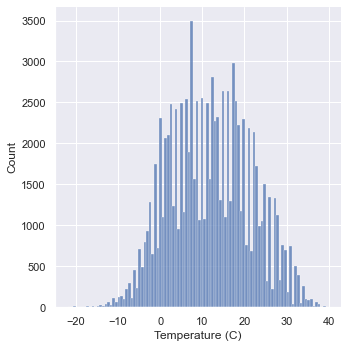

In [14]:
sns.displot(data["Temperature (C)"])

We can see that Temp is normaly distributed.


## Humidity 

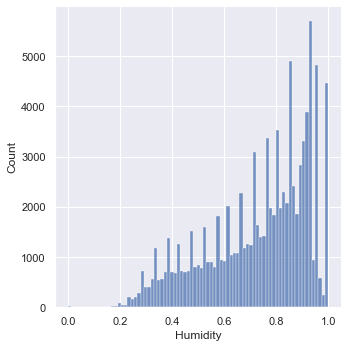

In [15]:
sns.displot(data["Humidity"])


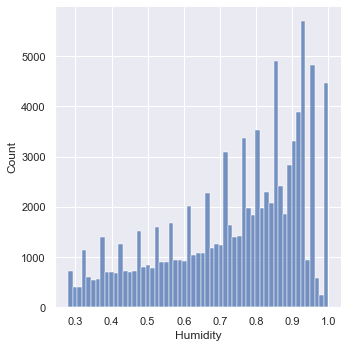

In [16]:
q = data["Humidity"].quantile(0.01)
data = data[data["Humidity"] > q]
sns.displot(data["Humidity"])

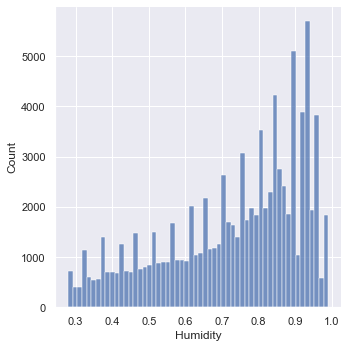

In [17]:
q = data["Humidity"].quantile(0.99)
data = data[data["Humidity"] < q]
sns.displot(data["Humidity"])

We normalised Humidity

## Wind Speed (km/h)

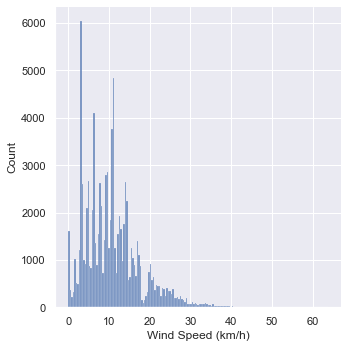

In [18]:
sns.displot(data["Wind Speed (km/h)"])

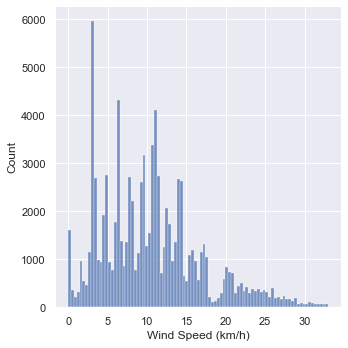

In [19]:
q = data["Wind Speed (km/h)"].quantile(0.99)
data = data[data["Wind Speed (km/h)"]<q]
sns.displot(data["Wind Speed (km/h)"])

we normalised Wind Speed

## Wind Bearings

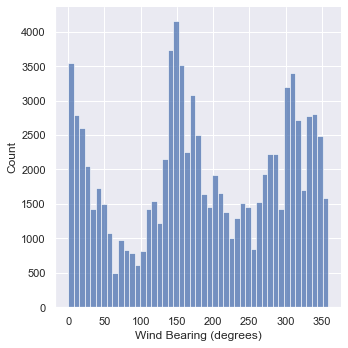

In [20]:
sns.displot(data["Wind Bearing (degrees)"])

Wind Bearing is normally distributed

## Visibility

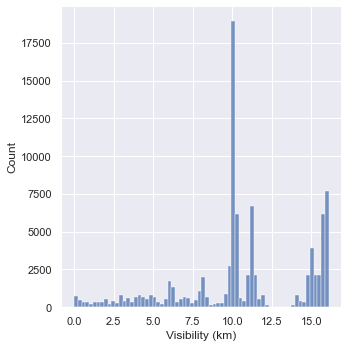

In [21]:
sns.displot(data["Visibility (km)"])

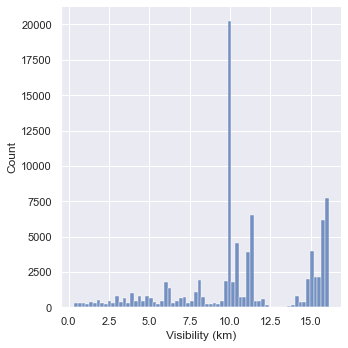

In [22]:
q = data["Visibility (km)"].quantile(0.01)
data = data[data["Visibility (km)"] > q]
sns.displot(data["Visibility (km)"])

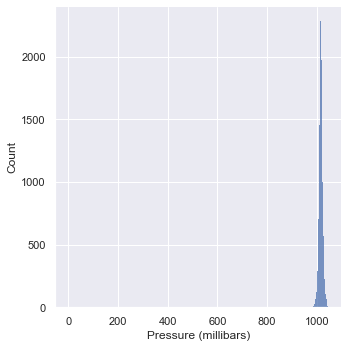

In [23]:
sns.displot(data["Pressure (millibars)"])

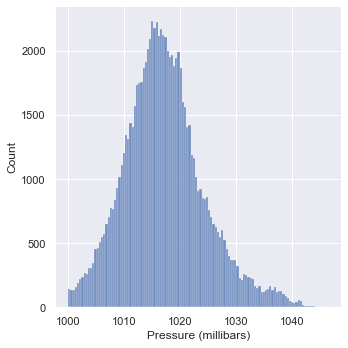

In [24]:
data = data[data["Pressure (millibars)"]>1000]
sns.displot(data["Pressure (millibars)"])

## Checking the OLS Assumptions

### A1: Linearity

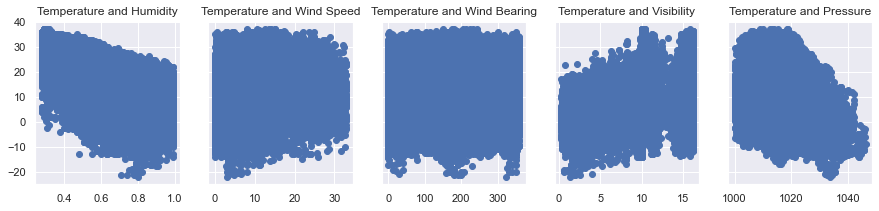

In [25]:
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,sharey=True,figsize=(15,3))

ax1.scatter(data["Humidity"],data["Temperature (C)"])
ax1.set_title("Temperature and Humidity")

ax2.scatter(data["Wind Speed (km/h)"],data["Temperature (C)"])
ax2.set_title("Temperature and Wind Speed")

ax3.scatter(data["Wind Bearing (degrees)"],data["Temperature (C)"])
ax3.set_title("Temperature and Wind Bearing")

ax4.scatter(data["Visibility (km)"],data["Temperature (C)"])
ax4.set_title("Temperature and Visibility")

ax5.scatter(data["Pressure (millibars)"],data["Temperature (C)"])
ax5.set_title("Temperature and Pressure")

plt.show()

In [26]:
data

,Temperature (C),Summary,Precip Type,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,Partly Cloudy,rain,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,Partly Cloudy,rain,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,Mostly Cloudy,rain,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,Partly Cloudy,rain,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,Mostly Cloudy,rain,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,26.016667,Partly Cloudy,rain,0.43,10.9963,31.0,16.1000,1014.36
96449,24.583333,Partly Cloudy,rain,0.48,10.0947,20.0,15.5526,1015.16
96450,22.038889,Partly Cloudy,rain,0.56,8.9838,30.0,16.1000,1015.66
96451,21.522222,Partly Cloudy,rain,0.60,10.5294,20.0,16.1000,1015.95


## Measure of multi-col.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Pressure (millibars)"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [28]:
vif


,VIF,features
0,18.967669,Humidity
1,3.936825,Wind Speed (km/h)
2,4.065488,Wind Bearing (degrees)
3,9.491877,Visibility (km)
4,41.719558,Pressure (millibars)


In [29]:
data = data.drop(["Pressure (millibars)"],axis=1)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [31]:
vif

,VIF,features
0,5.846587,Humidity
1,3.408850,Wind Speed (km/h)
2,3.916114,Wind Bearing (degrees)
3,5.664287,Visibility (km)


## Getting the Dummy vars.

In [32]:
data = pd.get_dummies(data, drop_first=True)

In [33]:
data.describe(include="all")

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,Summary_Breezy and Partly Cloudy,Summary_Clear,...,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Overcast,Summary_Humid and Partly Cloudy,Summary_Light Rain,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Precip Type_snow
count,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,...,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000
mean,12.211875,0.729769,10.538495,187.491313,10.726750,0.000126,0.002495,0.002621,0.001774,0.110713,...,0.050326,0.000458,0.000080,0.000195,0.000549,0.306581,0.174328,0.348689,0.000046,0.105368
std,9.442132,0.186488,6.362288,107.757533,3.896939,0.011220,0.049889,0.051129,0.042083,0.313778,...,0.218618,0.021392,0.008951,0.013948,0.023433,0.461077,0.379393,0.476558,0.006766,0.307029
min,-21.822222,0.280000,0.000000,0.000000,0.338100,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.600000,5.844300,114.000000,9.708300,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.272222,0.780000,9.853200,180.000000,10.255700,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.955556,0.890000,14.023100,290.000000,14.956900,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,37.266667,0.990000,32.988900,359.000000,16.100000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Create Linear Reg

In [34]:
targets = data["Temperature (C)"]
inputs  = data.drop(["Temperature (C)"],axis=1)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)


StandardScaler()

In [36]:
inputs_scaled = scaler.transform(inputs)

## Train -Test split

In [37]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(inputs_scaled, targets, test_size=0.2,random_state=42)

In [66]:
x_train.sum()

-154.35127446392454

## Regression itself

In [38]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [39]:
yhat = reg.predict(x_train)

Text(0.5, 1.0, 'Residuals')

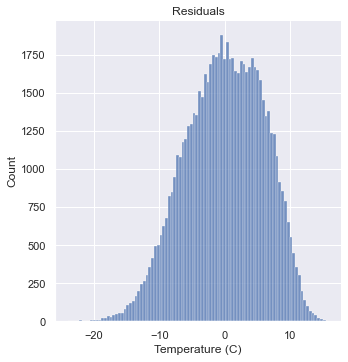

In [40]:
sns.displot(y_train -yhat)
plt.title("Residuals")

## R-squared

In [41]:
reg.score(x_train,y_train)

0.5989900356322071

## Adjusted R-squared

In [42]:
def AdjR2(r,n,p):
    return 1-(1-r)*(n-1)/(n-p-1)

In [69]:
print(AdjR2(0.5989900356322071,69896,23))


0.5988580338406388


## Weights and Bias

In [43]:
reg.intercept_

12.21224493159139

In [44]:
reg.coef_



array([-4.79498886e+00, -1.29292099e+00,  2.24634742e-01,  5.76720510e-01,
        9.46026721e-02,  5.53407571e-02,  9.30323923e-03, -4.48702134e-03,
        3.13157895e-03,  2.54704142e-02,  6.49002614e-02,  4.30802493e-02,
        1.03364420e-02, -1.02699465e-02,  2.52489276e-01,  1.10145334e-01,
        1.55227013e-01,  5.39455391e-02,  2.19236753e-01, -8.69132351e-02,
        6.58251301e-01,  1.38539774e-02, -4.03073014e+00])

In [45]:
reg_summary = pd.DataFrame(data=inputs.columns.values, columns=["Features"])
reg_summary["Weights"] = reg.coef_
reg_summary

,Features,Weights
0,Humidity,-4.794989
1,Wind Speed (km/h),-1.292921
2,Wind Bearing (degrees),0.224635
3,Visibility (km),0.576721
4,Summary_Breezy and Foggy,0.094603
5,Summary_Breezy and Mostly Cloudy,0.055341
6,Summary_Breezy and Overcast,0.009303
7,Summary_Breezy and Partly Cloudy,-0.004487
8,Summary_Clear,0.003132
9,Summary_Drizzle,0.025470


## Testing

In [46]:
yh_test  = reg.predict(x_test)

Text(0.5, 1.0, 'Residuals')

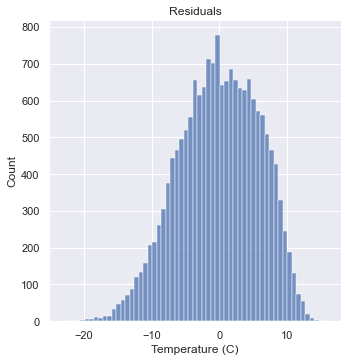

In [47]:
sns.displot(y_test -yh_test)
plt.title("Residuals")

In [48]:
df_pf = pd.DataFrame(yh_test,columns=["Predictions"])
df_pf

,Predictions
0,21.225127
1,16.722345
2,21.714187
3,19.748124
4,13.943670
...,...
17469,8.390073
17470,12.503903
17471,10.816052
17472,7.596487


In [49]:
df_pf["Targets"] = y_test
df_pf.isnull().sum()


Predictions        0
Targets        14286
dtype: int64

In [50]:
y_test = y_test.reset_index(drop=True)

In [51]:
df_pf = pd.DataFrame(yh_test,columns=["Predictions"])
df_pf

,Predictions
0,21.225127
1,16.722345
2,21.714187
3,19.748124
4,13.943670
...,...
17469,8.390073
17470,12.503903
17471,10.816052
17472,7.596487


In [52]:
df_pf["Targets"] = y_test
df_pf

,Predictions,Targets
0,21.225127,22.177778
1,16.722345,17.822222
2,21.714187,24.122222
3,19.748124,22.111111
4,13.943670,6.350000
...,...,...
17469,8.390073,5.755556
17470,12.503903,1.666667
17471,10.816052,1.133333
17472,7.596487,2.761111


In [53]:
df_pf["Residual"] = df_pf["Targets"] - df_pf["Predictions"]
df_pf

,Predictions,Targets,Residual
0,21.225127,22.177778,0.952651
1,16.722345,17.822222,1.099877
2,21.714187,24.122222,2.408035
3,19.748124,22.111111,2.362988
4,13.943670,6.350000,-7.593670
...,...,...,...
17469,8.390073,5.755556,-2.634517
17470,12.503903,1.666667,-10.837236
17471,10.816052,1.133333,-9.682719
17472,7.596487,2.761111,-4.835376


In [54]:
df_pf["Diff.%"] = np.absolute(df_pf["Residual"]/df_pf["Targets"]*100)

In [55]:
df_pf

,Predictions,Targets,Residual,Diff.%
0,21.225127,22.177778,0.952651,4.295521
1,16.722345,17.822222,1.099877,6.171380
2,21.714187,24.122222,2.408035,9.982643
3,19.748124,22.111111,2.362988,10.686878
4,13.943670,6.350000,-7.593670,119.585355
...,...,...,...,...
17469,8.390073,5.755556,-2.634517,45.773466
17470,12.503903,1.666667,-10.837236,650.234174
17471,10.816052,1.133333,-9.682719,854.357559
17472,7.596487,2.761111,-4.835376,175.124294


In [56]:
df_pf.describe()

,Predictions,Targets,Residual,Diff.%
count,17474.000000,17474.000000,17474.000000,1.747400e+04
mean,12.168105,12.166256,-0.001849,inf
std,7.365540,9.458618,5.983064,NaN
min,-11.508528,-21.111111,-23.217043,4.616495e-03
25%,8.715760,4.972222,-4.181038,1.682999e+01
50%,12.322396,12.275000,0.141323,3.338544e+01
75%,17.132269,18.943056,4.589994,7.856784e+01
max,33.070675,36.205556,16.115726,inf


In [57]:
df_pf.sort_values(by=["Diff.%"])

,Predictions,Targets,Residual,Diff.%
16901,11.138375,11.138889,0.000514,0.004616
14252,10.553936,10.555556,0.001620,0.015344
11737,18.285122,18.288889,0.003767,0.020598
707,13.952015,13.955556,0.003540,0.025367
14505,10.880079,10.883333,0.003255,0.029905
...,...,...,...,...
1060,-2.396385,0.000000,2.396385,inf
16504,-4.098274,0.000000,4.098274,inf
2859,-5.591220,0.000000,5.591220,inf
8556,3.751450,0.000000,-3.751450,inf
